###### Import all the libraries needed so far

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os       
import seaborn as sns
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

###### Read the file

In [5]:
#read the file
# for windows
# df = pd.read_csv(r'F:\Files\4WIN\Machine Learning\Projects and presentations\Project\kddcup.csv', error_bad_lines=False)
df = pd.read_csv(r'kddcup.csv', error_bad_lines=False)
df

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


###### Add the labels

In [6]:
df.columns =['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations','lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class']

In [7]:
len(df.columns)

42

In [8]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


###### Look for duplicates (no duplicates)

In [9]:
df.duplicated(subset=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations','lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'], keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
494015    False
494016    False
494017    False
494018    False
494019    False
Length: 494020, dtype: bool

In [10]:
df.duration.nunique()

2495

###### No null values

In [11]:
df.isnull().values.any()

False

###### Look for protocol types(see which one have more count (can lead to biased results if there is a huge diff))
###### when spliting data later we should take this into consideration
###### we should downsample icmp and tcp or more likely upsample udp(making duplicates)

In [12]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

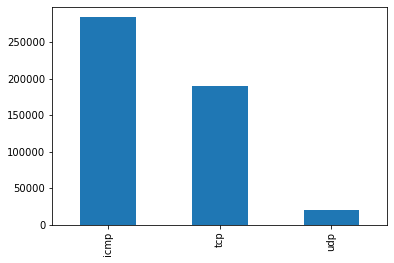

In [13]:
bar_graph('protocol_type')
plt.show()

###### Same thing with services

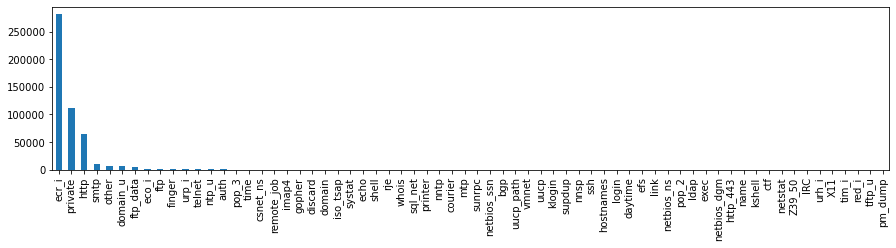

In [14]:
plt.figure(figsize=(15,3))
bar_graph('service')
plt.show()

###### Keep unique columns

In [15]:
# keep columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1]]

###### See the correlation between columns

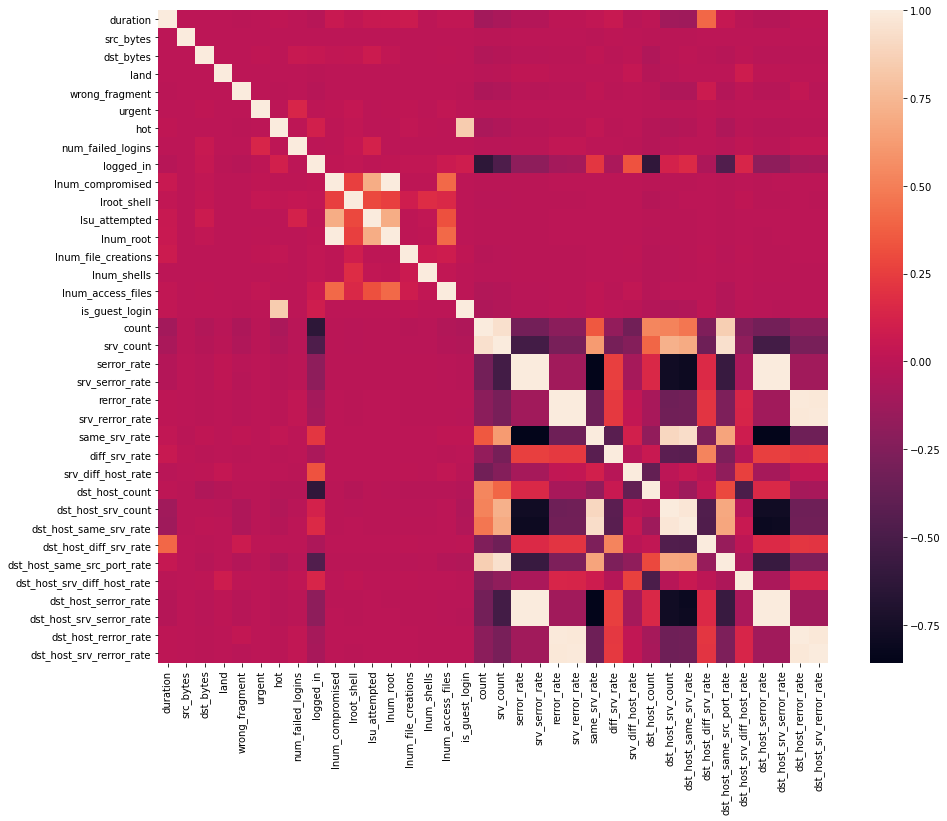

In [16]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

###### Notice important correlation between some columns
###### prompt this corrolation in numbers 

In [17]:
print(df['lnum_root'].corr(df['lnum_compromised']))
print(df['srv_serror_rate'].corr(df['serror_rate']))
print(df['srv_count'].corr(df['count']))
print(df['srv_rerror_rate'].corr(df['rerror_rate']))
print(df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count']))
print(df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate']))
print(df['dst_host_same_srv_rate'].corr(df['same_srv_rate']))
print(df['dst_host_same_src_port_rate'].corr(df['srv_count']))
print(df['dst_host_serror_rate'].corr(df['serror_rate']))
print(df['dst_host_serror_rate'].corr(df['srv_serror_rate']))
print(df['dst_host_srv_serror_rate'].corr(df['serror_rate']))
print(df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate']))
print(df['dst_host_rerror_rate'].corr(df['rerror_rate']))
print(df['dst_host_rerror_rate'].corr(df['srv_rerror_rate']))
print(df['dst_host_srv_rerror_rate'].corr(df['rerror_rate']))
print(df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate']))

0.9938277978733892
0.9983615065593135
0.9436669953129941
0.9947309533247501
0.973690696084731
0.9981559165358104
0.9278079908913476
0.9449262532054893
0.9986729674316656
0.9978352994314852
0.9978492476329173
0.9993041088826766
0.9869947908670031
0.9821663404802354
0.9851995522241952
0.9865705421992075


In [18]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('lnum_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.00,59,59,0.0,0.02,0.00,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal.


In [20]:
len(df.columns)

32

In [21]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'class'],
      dtype='object')

In [22]:
pd.unique(df.iloc[:,31])

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [23]:
attacks_types = {
    'normal.': 'normal',
'back.': 'dos',
'buffer_overflow.': 'u2r',
'ftp_write.': 'r2l',
'guess_passwd.': 'r2l',
'imap.': 'r2l',
'ipsweep.': 'probe',
'land.': 'dos',
'loadmodule.': 'u2r',
'multihop.': 'r2l',
'neptune.': 'dos',
'nmap.': 'probe',
'perl.': 'u2r',
'phf.': 'r2l',
'pod.': 'dos',
'portsweep.': 'probe',
'rootkit.': 'u2r',
'satan.': 'probe',
'smurf.': 'dos',
'spy.': 'r2l',
'teardrop.': 'dos',
'warezclient.': 'r2l',
'warezmaster.': 'r2l',
}

In [24]:
df = df.replace({"class": attacks_types})
pd.unique(df.iloc[:,31])

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [25]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

In [26]:
df['class'].value_counts()

dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: class, dtype: int64

### Modelisation Random Forest Classifier

In [27]:
X = df.drop('class', axis=1)
y = df['class'].values

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [26]:
X_train.shape, X_test.shape

((345814, 31), (148206, 31))

In [27]:
# check data types in X_train
X_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

##### we can notice that protocol_type, service, and flag are all categorical type, so we need to encode them using category_encoders

In [28]:
# pip install category_encoders
import category_encoders as ce

In [29]:
encoder = ce.OrdinalEncoder(cols=['protocol_type', 'service', 'flag'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [30]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
74145,1,1,1,1,967,323,0,0,0,0,...,0.0,0.0,1.00,0.00,1.0,75,139,0.05,0.01,0.02
24857,0,1,2,1,308,367,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,0.00,0.00
266181,0,2,3,1,1032,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00
56726,0,1,4,2,0,0,0,0,0,0,...,1.0,0.0,0.07,0.07,0.0,255,17,0.07,0.00,0.00
417388,0,2,3,1,520,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.00


In [31]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

In [32]:
# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9998


In [33]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9998


###   Features selection process using the Random Forest model to find only the important features

In [34]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

count                          0.296563
dst_bytes                      0.120731
service                        0.090258
logged_in                      0.070925
dst_host_count                 0.059094
dst_host_srv_diff_host_rate    0.050922
srv_count                      0.046162
src_bytes                      0.041603
dst_host_same_src_port_rate    0.035609
same_srv_rate                  0.034116
protocol_type                  0.021696
dst_host_diff_srv_rate         0.021428
dst_host_srv_count             0.019629
diff_srv_rate                  0.019377
serror_rate                    0.016803
flag                           0.014988
srv_diff_host_rate             0.014979
lnum_compromised               0.006968
hot                            0.006736
rerror_rate                    0.004075
wrong_fragment                 0.003837
duration                       0.002597
is_guest_login                 0.000488
num_failed_logins              0.000147
lroot_shell                    0.000075


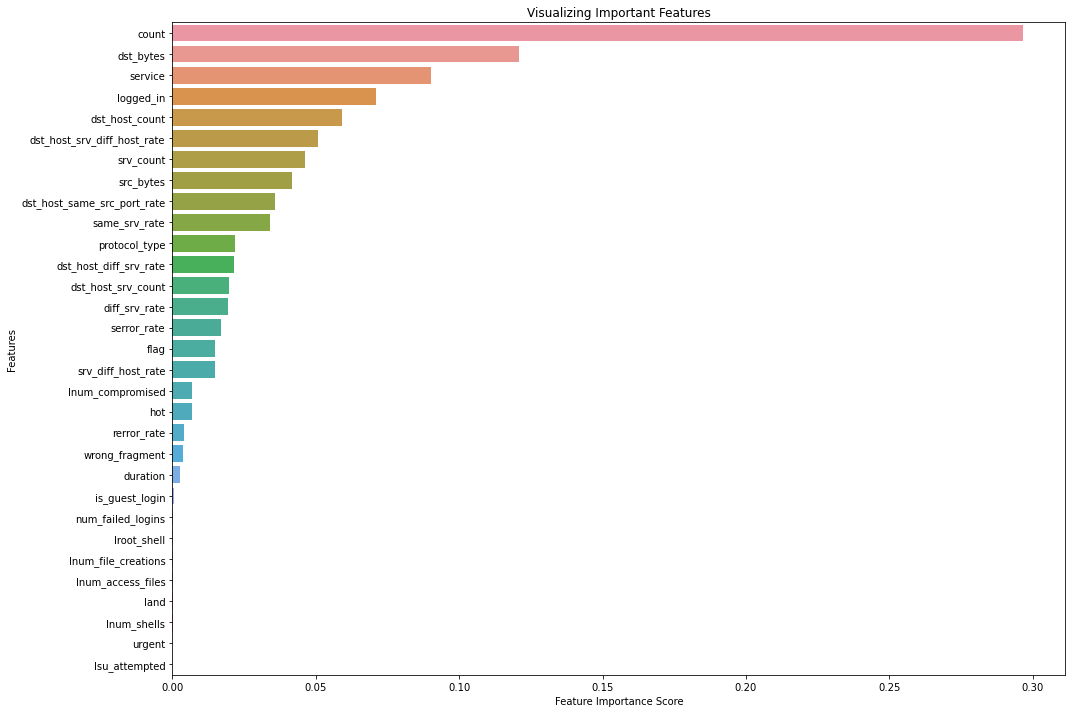

In [36]:
# Creating a seaborn bar plot
plt.figure(figsize=(16,12))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### we rebuild our model using the selected features 

In [37]:
# declare feature vector and target variable

X = df.drop(['class', 'lsu_attempted','urgent','lnum_shells','land','lnum_access_files','lnum_file_creations',
            'lroot_shell','num_failed_logins','is_guest_login','duration','wrong_fragment','rerror_rate','hot',
            'lnum_compromised'], axis=1)

y = df['class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [39]:
X_train.dtypes

protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
logged_in                        int64
count                            int64
srv_count                        int64
serror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dtype: object

In [40]:
encoder = ce.OrdinalEncoder(cols=['protocol_type', 'service', 'flag'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [41]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9997


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[117225      3      0      0      0]
 [     3  29343      2      8      2]
 [     1      7   1286      0      0]
 [     0      7      0    303      0]
 [     0      6      0      0     10]]


In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    117228
      normal       1.00      1.00      1.00     29358
       probe       1.00      0.99      1.00      1294
         r2l       0.97      0.98      0.98       310
         u2r       0.83      0.62      0.71        16

    accuracy                           1.00    148206
   macro avg       0.96      0.92      0.94    148206
weighted avg       1.00      1.00      1.00    148206



In [44]:
names = ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in','count', 'srv_count', 'serror_rate',
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count ', 'dst_host_srv_count', 'dst_host_diff_srv_rate'
        ,'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate ']

In [56]:
from sklearn.tree import export_text
text_representation = export_text(clf.estimators_[5], feature_names=names,show_weights=True)
print(text_representation)

|--- dst_bytes <= 0.50
|   |--- dst_host_count  <= 254.50
|   |   |--- dst_host_srv_diff_host_rate  <= 0.49
|   |   |   |--- dst_host_srv_count <= 49.50
|   |   |   |   |--- logged_in <= 0.50
|   |   |   |   |   |--- serror_rate <= 0.59
|   |   |   |   |   |   |--- srv_count <= 12.50
|   |   |   |   |   |   |   |--- same_srv_rate <= 0.19
|   |   |   |   |   |   |   |   |--- src_bytes <= 0.50
|   |   |   |   |   |   |   |   |   |--- flag <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- diff_srv_rate <= 0.31
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00, 0.00, 0.00, 0.00] class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- diff_srv_rate >  0.31
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 13.00, 0.00, 0.00] class: 2.0
|   |   |   |   |   |   |   |   |   |--- flag >  3.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 4.00, 0.00, 0.00] class: 2.0
|   |   |   |   |   |   |   |   |--- src_bytes >  0.50
|   |   |  

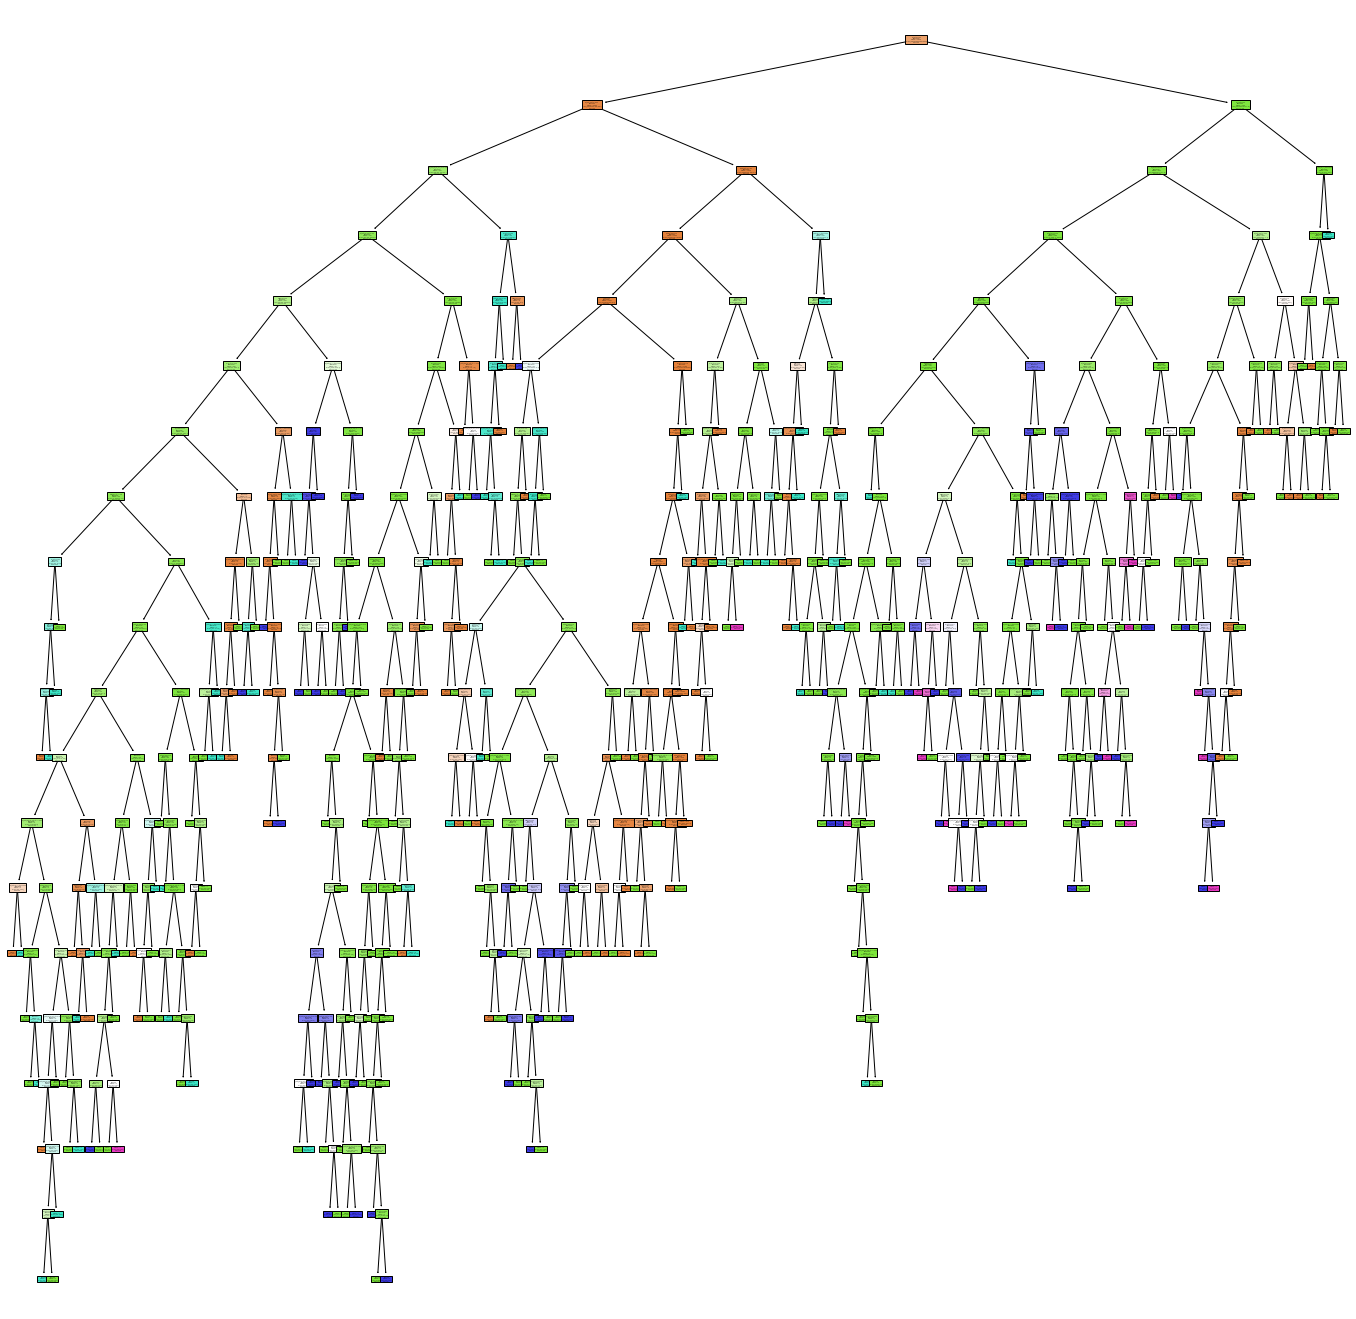

In [52]:
from sklearn.tree import plot_tree
target_val = ["dos","normal","probe","r2l","u2r"]
plt.figure(figsize=(24,24))
plot_tree(clf.estimators_[5], feature_names = X_test.columns,class_names=target_val,filled=True);

In [54]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree